In [83]:
# Doing all the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [84]:
# Loading the digits 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
X_train = X_train.reshape((60000,28,28,1))/255
X_test = X_test.reshape((10000,28,28,1))/255

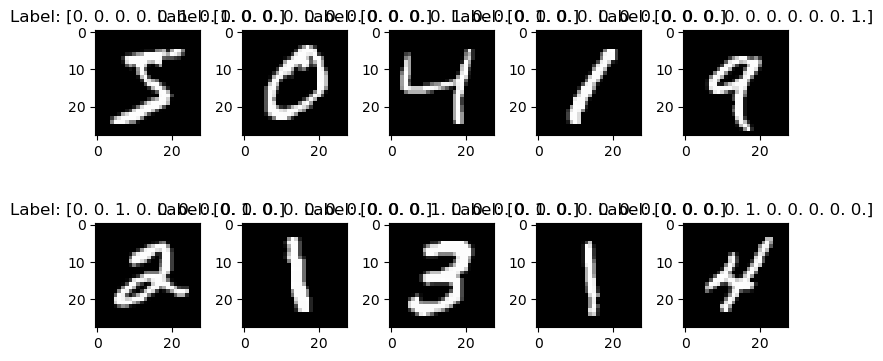

In [85]:
num = 10

num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()



In [86]:
X_train[0].shape

(28, 28, 1)

In [87]:
# Initializing the model
cnn = tf.keras.models.Sequential()

In [88]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))

In [89]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [90]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape = (28,28,1)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [91]:
cnn.add(tf.keras.layers.Flatten())

In [92]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [93]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [94]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [95]:
cnn.fit(x = X_train, y=y_train, validation_data=(X_test, y_test), epochs = 5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 375s 199ms/step - loss: 0.1652 - accuracy: 0.9501 - val_loss: 0.0615 - val_accuracy: 0.9791
Epoch 2/5
1875/1875 [==============================] - 4162s 2s/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0425 - val_accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 353s 188ms/step - loss: 0.0371 - accuracy: 0.9884 - val_loss: 0.0351 - val_accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 32931s 18s/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0279 - val_accuracy: 0.9903
Epoch 5/5
1875/1875 [==============================] - 344s 184ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0337 - val_accuracy: 0.9901


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


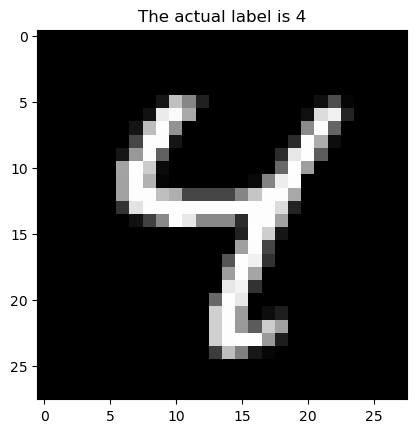

In [115]:
sample = 6
fig = plt.figure
plt.title(f'The actual label is {np.argmax(y_test[sample])}')
plt.imshow(X_test[sample], cmap='gray')
print(y_test[sample])

1/1 [==============================] - 0s 20ms/step
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


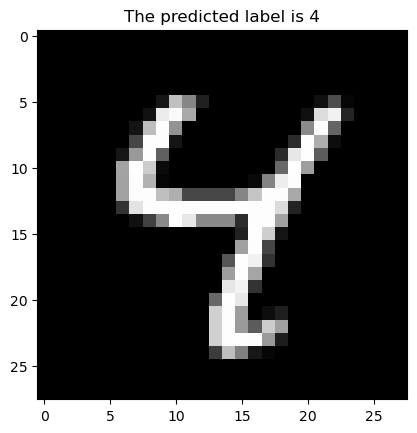

In [116]:

y_pred = cnn.predict(np.expand_dims(X_test[sample], axis=0))
y_pred = np.argmax(y_pred)

fig = plt.figure
plt.title(f'The predicted label is {y_pred}')
plt.imshow(X_test[sample], cmap='gray')
print(y_test[sample])